In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [19]:
df=pd.read_csv('COVID-19 cases worldwide - daily-6.csv')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [20]:
df1=df[df['countriesAndTerritories']=='India']
df1.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
26745,14/12/2020,14,12,2020,27071,336,India,IN,IND,1.366418e+09,Asia,33.109128
26746,13/12/2020,13,12,2020,30254,391,India,IN,IND,1.366418e+09,Asia,33.965454
26747,12/12/2020,12,12,2020,30006,442,India,IN,IND,1.366418e+09,Asia,34.811169
26748,11/12/2020,11,12,2020,29398,414,India,IN,IND,1.366418e+09,Asia,35.639320
26749,10/12/2020,10,12,2020,31521,412,India,IN,IND,1.366418e+09,Asia,36.640771


In [21]:
df1=df1[['dateRep','cases']]
df1.head()

,dateRep,cases
26745,14/12/2020,27071
26746,13/12/2020,30254
26747,12/12/2020,30006
26748,11/12/2020,29398
26749,10/12/2020,31521


In [22]:
data=df1.filter(['cases']).values
data

array([[27071],
       [30254],
       [30006],
       [29398],
       [31521],
       [32080],
       [26567],
       [32981],
       [36011],
       [36652],
       [36595],
       [35551],
       [36604],
       [31118],
       [38772],
       [41810],
       [41322],
       [43082],
       [44489],
       [44376],
       [37975],
       [44059],
       [45209],
       [46232],
       [45882],
       [45576],
       [38617],
       [29163],
       [30548],
       [41100],
       [44684],
       [44879],
       [47905],
       [44281],
       [38073],
       [45903],
       [45674],
       [50356],
       [47638],
       [50210],
       [46253],
       [38310],
       [45231],
       [46963],
       [48268],
       [48648],
       [49881],
       [43893],
       [36470],
       [45148],
       [50129],
       [53370],
       [54366],
       [55839],
       [54044],
       [46790],
       [55722],
       [61871],
       [62212],
       [63371],
       [67708],
       [63509],
       [

In [23]:
train_data_len = int(np.ceil(len(data) * .8))

In [24]:
train_data_len

280

In [25]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [26]:
# Create the training data set
train_data = scaled_data[0:train_data_len , : ]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(12,len(train_data)):
    x_train.append(train_data[i-12:i,0])
    y_train.append(train_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
x_train.shape

(268, 12)

In [28]:
# Reshape the data to fit the model
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [29]:
x_train.shape

(268, 12, 1)

In [32]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
9/9 [==============================] - 5s 15ms/step - loss: 0.1248
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0293
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0210
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0110
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0090
Epoch 6/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0072
Epoch 7/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0079
Epoch 8/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0069
Epoch 9/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0060
Epoch 10/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0075
Epoch 11/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0070
Epoch 12/50
9/9 [==============================] - 0s 19ms/step - loss: 0.0083
Epoch 13/50
9/9 [==============================] - 0s 17ms/st

In [31]:
# Create the testing data set
test_data = scaled_data[train_data_len - 12: , : ]

# Create the x_test and y_test data sets
x_test = []
y_test = data[train_data_len : , : ]

for i in range(12,len(test_data)):
    x_test.append(test_data[i-12:i,0])

x_test = np.array(x_test)

# Reshape the data to fit the model
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [33]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

3/3 [==============================] - 1s 5ms/step
1781.1411066750595


<ipython-input-34-988772fecfdf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


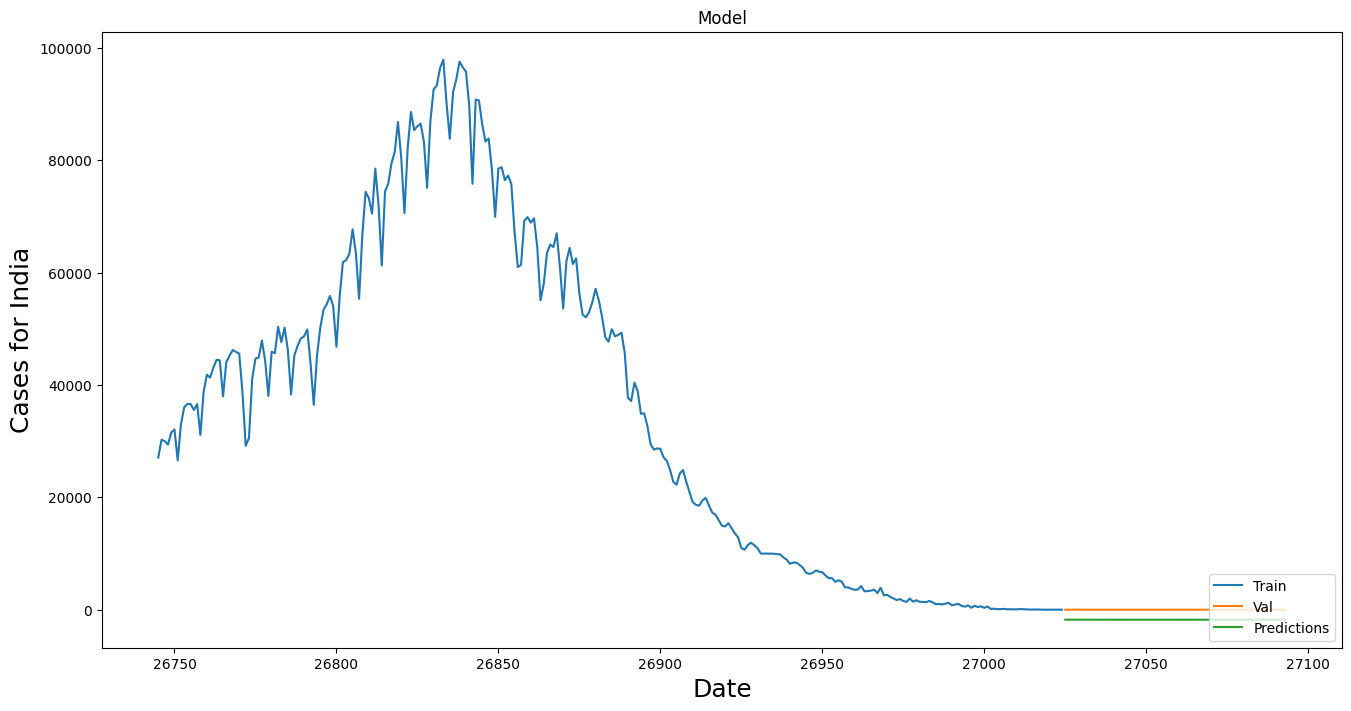

In [34]:
# Plot the data
import matplotlib.pyplot as plt

train = df1[:train_data_len]
valid = df1[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Cases for India', fontsize=18)
plt.plot(train['cases'])
plt.plot(valid[['cases', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<ipython-input-42-251278797d31>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['dateRep']=pd.to_datetime(df1['dateRep'])


Epoch 1/50
9/9 [==============================] - 5s 14ms/step - loss: 0.0339
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0113
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0048
Epoch 4/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0054
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0048
Epoch 6/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0055
Epoch 7/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0040
Epoch 8/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0036
Epoch 9/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0045
Epoch 10/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0038
Epoch 11/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0039
Epoch 12/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0045
Epoch 13/50
9/9 [==============================] - 0s 16ms/st

3/3 [==============================] - 1s 5ms/step


<ipython-input-42-251278797d31>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


7466.792964460683


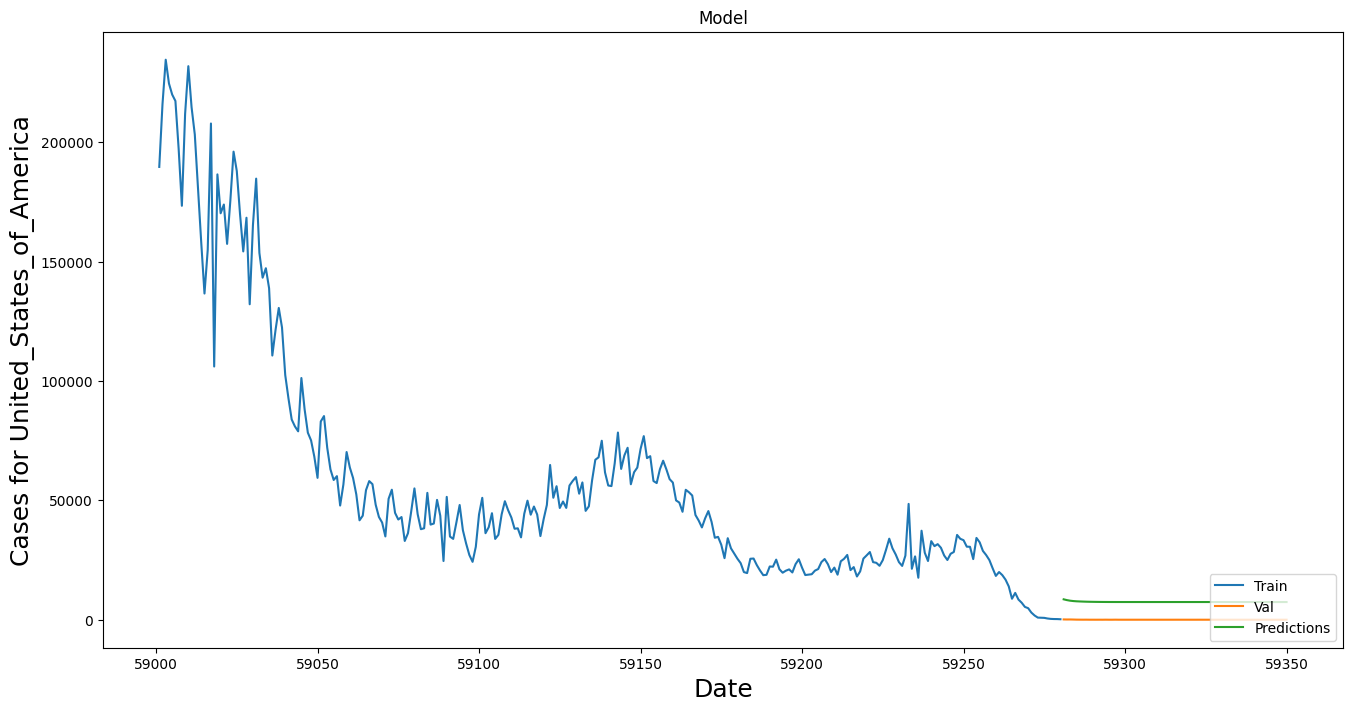

In [42]:
df1=df[df['countriesAndTerritories']=='United_States_of_America']
df1=df1[['dateRep','cases']]
df1['dateRep']=pd.to_datetime(df1['dateRep'])
# df1.sort_values(by='dateRep',inplace=True)
data=df1.filter(['cases']).values
train_data_len = int(np.ceil(len(data) * .8))
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
# Create the training data set
train_data = scaled_data[0:train_data_len , : ]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(12,len(train_data)):
    x_train.append(train_data[i-12:i,0])
    y_train.append(train_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data to fit the model
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Create the testing data set
test_data = scaled_data[train_data_len - 12: , : ]

# Create the x_test and y_test data sets
x_test = []
y_test = data[train_data_len : , : ]

for i in range(12,len(test_data)):
    x_test.append(test_data[i-12:i,0])

x_test = np.array(x_test)

# Reshape the data to fit the model
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)
# Plot the data
import matplotlib.pyplot as plt

train = df1[:train_data_len]
valid = df1[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Cases for United_States_of_America', fontsize=18)
plt.plot(train['cases'])
plt.plot(valid[['cases', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [43]:
model.save('usa_model.h5')

<ipython-input-48-f34487dfa3f9>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['dateRep']=pd.to_datetime(df1['dateRep'])


Epoch 1/50
9/9 [==============================] - 5s 20ms/step - loss: 0.1213
Epoch 2/50
9/9 [==============================] - 0s 21ms/step - loss: 0.0342
Epoch 3/50
9/9 [==============================] - 0s 22ms/step - loss: 0.0258
Epoch 4/50
9/9 [==============================] - 0s 21ms/step - loss: 0.0114
Epoch 5/50
9/9 [==============================] - 0s 21ms/step - loss: 0.0088
Epoch 6/50
9/9 [==============================] - 0s 22ms/step - loss: 0.0082
Epoch 7/50
9/9 [==============================] - 0s 22ms/step - loss: 0.0084
Epoch 8/50
9/9 [==============================] - 0s 27ms/step - loss: 0.0093
Epoch 9/50
9/9 [==============================] - 0s 27ms/step - loss: 0.0077
Epoch 10/50
9/9 [==============================] - 0s 24ms/step - loss: 0.0084
Epoch 11/50
9/9 [==============================] - 0s 25ms/step - loss: 0.0072
Epoch 12/50
9/9 [==============================] - 0s 26ms/step - loss: 0.0079
Epoch 13/50
9/9 [==============================] - 0s 26ms/st

<ipython-input-48-f34487dfa3f9>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


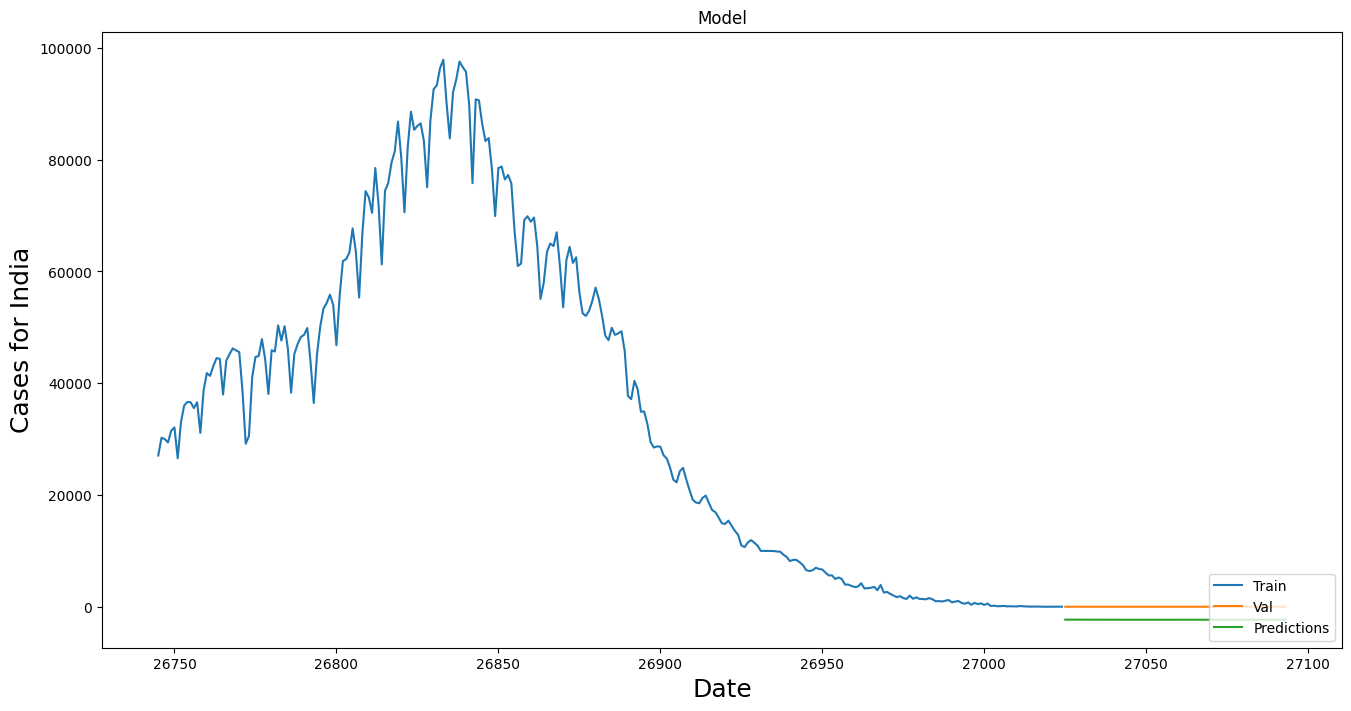

In [48]:
df1=df[df['countriesAndTerritories']=='India']
df1=df1[['dateRep','cases']]
df1['dateRep']=pd.to_datetime(df1['dateRep'])
# df1.sort_values(by='dateRep',inplace=True)
data=df1.filter(['cases']).values
train_data_len = int(np.ceil(len(data) * .8))
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
# Create the training data set
train_data = scaled_data[0:train_data_len , : ]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(12,len(train_data)):
    x_train.append(train_data[i-12:i,0])
    y_train.append(train_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data to fit the model
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Create the testing data set
test_data = scaled_data[train_data_len - 12: , : ]

# Create the x_test and y_test data sets
x_test = []
y_test = data[train_data_len : , : ]

for i in range(12,len(test_data)):
    x_test.append(test_data[i-12:i,0])

x_test = np.array(x_test)

# Reshape the data to fit the model
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)
# Plot the data
import matplotlib.pyplot as plt

train = df1[:train_data_len]
valid = df1[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Cases for India', fontsize=18)
plt.plot(train['cases'])
plt.plot(valid[['cases', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [49]:
model.save('india_model.h5')

<ipython-input-46-154f1a0c544a>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['dateRep']=pd.to_datetime(df1['dateRep'])


Epoch 1/50
9/9 [==============================] - 8s 28ms/step - loss: 0.0917
Epoch 2/50
9/9 [==============================] - 0s 29ms/step - loss: 0.0363
Epoch 3/50
9/9 [==============================] - 0s 26ms/step - loss: 0.0364
Epoch 4/50
9/9 [==============================] - 0s 43ms/step - loss: 0.0284
Epoch 5/50
9/9 [==============================] - 0s 37ms/step - loss: 0.0295
Epoch 6/50
9/9 [==============================] - 0s 45ms/step - loss: 0.0274
Epoch 7/50
9/9 [==============================] - 0s 33ms/step - loss: 0.0267
Epoch 8/50
9/9 [==============================] - 0s 32ms/step - loss: 0.0261
Epoch 9/50
9/9 [==============================] - 0s 33ms/step - loss: 0.0267
Epoch 10/50
9/9 [==============================] - 0s 22ms/step - loss: 0.0249
Epoch 11/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0260
Epoch 12/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0232
Epoch 13/50
9/9 [==============================] - 0s 18ms/st

<ipython-input-46-154f1a0c544a>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


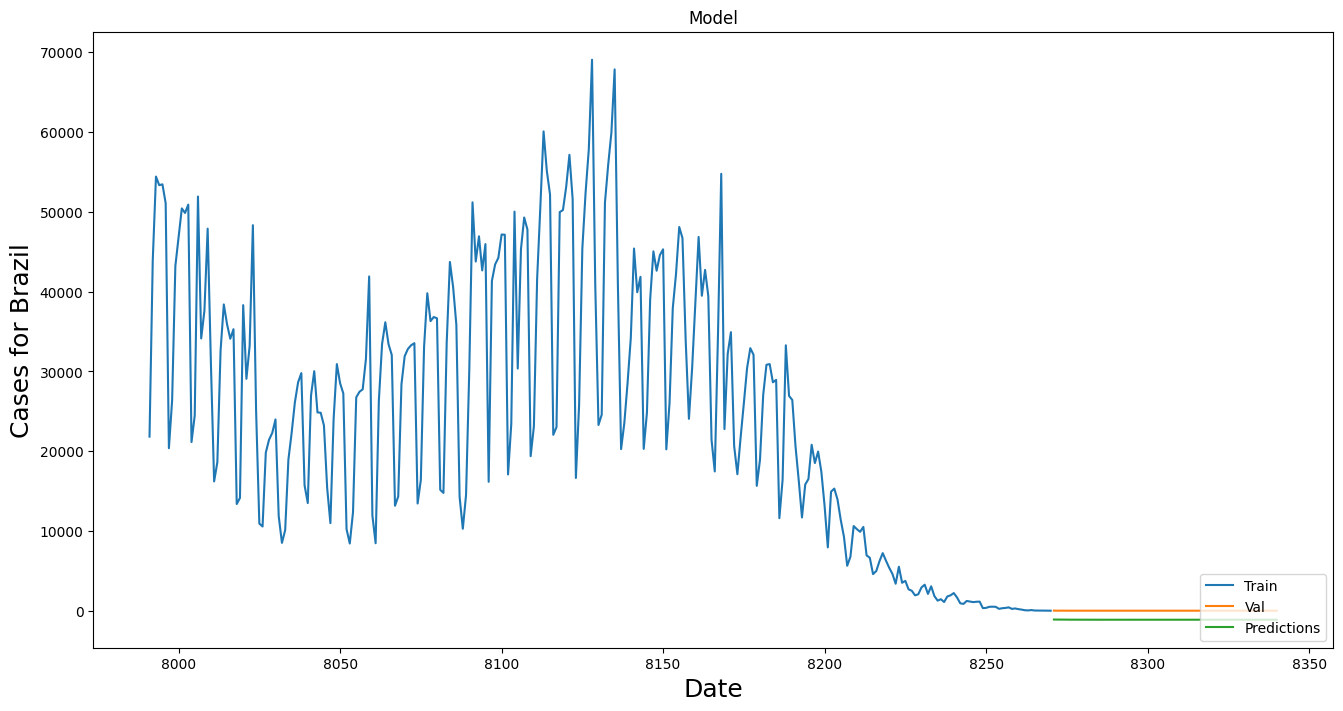

In [46]:
df1=df[df['countriesAndTerritories']=='Brazil']
df1=df1[['dateRep','cases']]
# df1['dateRep']=pd.to_datetime(df1['dateRep'])
# df1.sort_values(by='dateRep',inplace=True)
data=df1.filter(['cases']).values
train_data_len = int(np.ceil(len(data) * .8))
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
# Create the training data set
train_data = scaled_data[0:train_data_len , : ]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(12,len(train_data)):
    x_train.append(train_data[i-12:i,0])
    y_train.append(train_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data to fit the model
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Create the testing data set
test_data = scaled_data[train_data_len - 12: , : ]

# Create the x_test and y_test data sets
x_test = []
y_test = data[train_data_len : , : ]

for i in range(12,len(test_data)):
    x_test.append(test_data[i-12:i,0])

x_test = np.array(x_test)

# Reshape the data to fit the model
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)
# Plot the data
import matplotlib.pyplot as plt

train = df1[:train_data_len]
valid = df1[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Cases for Brazil', fontsize=18)
plt.plot(train['cases'])
plt.plot(valid[['cases', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [47]:
model.save('brazil_model.h5')